#### style

In [82]:
%%html
<style>
.container {width: 90% !important; }
#logo
{
    float: left;
}
#names
{
    float: right;
    
}
#logo2
{
    float: right;
    height=100;
    width=100;
    margin: 5px;
}
#top_menu
{
    margin: 20px auto 0;
    
    height:300px;
    width: 400px;
}
</style>

# Spatially Enabled Data Frames

<center>
<img src="./img/pandas_globe.png"/></center>

## Overview 

### Built on a Pandas
   + Special `spatial` and `geom` namespaces
   + Has a custom `Geometry` column type

### Provides a different geospatial experience:
   + In Memory
   + Fast
   + On the Fly Indexing
   + Multi-platform

### Custom Namespaces!

   + `geom` on Series
   
   ```python
   >>> df['SHAPE'].geom.area
   ```
    
   + `spatial` on the the DataFrame
    
   ```python
   >>> df.spatial.project_as(4326)
   ```

### Other Benefits

- Cross platform spatial analysis
    + Mac, Linux, and Windows

- Multi-geometry engine support

    + Esri Arcpy's Engine
    + Shapely/Geos
    
- Read/write data

    + Fiona, shapefile, and arcpy

## Getting Started

It starts with two imports

In [83]:
import pandas as pd
from arcgis.features import GeoAccessor, GeoSeriesAccessor

- Loads Pandas
- The `GeoAccessor` and `GeoSeriesAccessor` load the namespaces into Pandas

### Data I/O

#### Consumption

- Feature Layers
- Data Frames
- Feature classes

```python

    from arcgis.features import FeatureLayer
    fl = FeatureLayer(("https://services2.arcgis.com/zPFLSOZ5HzUzzTQb/arcgis"
                       "/rest/services/CensusBlockGroup/FeatureServer/0"))
    sdf1 = pd.DataFrame.spatial.from_layer(fl)
    sdf2 = pd.DataFrame.spatial.from_featureclass("./data/historic_traffic.shp")
    df_earthquakes = pd.read_csv("https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/all_hour.csv")
    sdf3 = pd.DataFrame.spatial.from_xy(df=df_earthquakes, 
                                        x_column="longitude", 
                                        y_column="latitude", 
                                        sr=4326)
```

#### Persistence of Data

- Tables
- Feature Classes
- Services

```python
    item = gis.content.import_data(df=sdf1, title="CensusBlockGroup")
    sdf1.spatial.to_featureclass(location="./data/stage.gdb/census")
```

## Working with the Series Namespace

##### Recall:
   - A series is a 1-D array of values
    

#### Reading a Feature Class

In [84]:
# %load solutions/part3_sedf/sol1.py
data = "./data/sample_data.gdb/Zoning"
sdf = pd.DataFrame.spatial.from_featureclass(data)
sdf.SHAPE.head()


0    {"rings": [[[2242922.9448516667, 1428590.30388...
1    {"rings": [[[2244762.3210941665, 1428362.87585...
2    {"rings": [[[2265042.980992086, 1434626.455850...
3    {"rings": [[[2255173.350140836, 1439479.499949...
4    {"rings": [[[2256905.097989667, 1426518.668916...
Name: SHAPE, dtype: geometry

#### Adding Centroid to Table

In [85]:
# %load solutions/part3_sedf/sol2.py
sdf['centers'] = sdf.SHAPE.geom.centroid
sdf['centers'].head()

0      (2246635.4023285583, 1430360.79215311)
1     (2244730.532443829, 1428473.1689439863)
2    (2264768.3837722465, 1434785.5700330734)
3     (2255113.134710077, 1439986.1091726571)
4     (2255507.380357568, 1427113.2501990118)
Name: centers, dtype: object

#### Example Calculating Areas

In [86]:
# %load solutions/part3_sedf/sol3.py
sdf.SHAPE.geom.get_area("PLANAR","ACRES").sum()

7207.710345041966

## Working with the DataFrame Namespace

- The `spatial` name space provides:
    + Dataset level operations
    + Dataset information
    + I/O operations exist here

### `Spatial` Operation Examples

#### Visualize Bounding Box

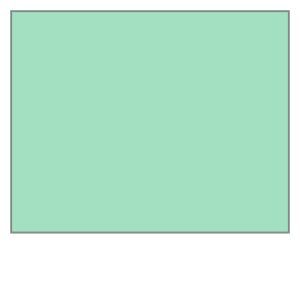

In [87]:
# %load solutions/part3_sedf/sol4.py
data = "./data/sample_data.gdb/Zoning"
sdf = pd.DataFrame.spatial.from_featureclass(data)
sdf.spatial.bbox

#### Full Extent

In [88]:
sdf.spatial.full_extent

(2241494.805975668, 1424369.956021838, 2266710.892026335, 1444478.7009092495)

#### Reprojecting

In [89]:
sdf.spatial.sr

{'wkid': 102667, 'latestWkid': 2240}

In [90]:
# %load solutions/part3_sedf/sol5.py
sdf.spatial.project(4326)
sdf.spatial.sr

{'wkid': 4326, 'latestWkid': 4326}

In [91]:
sdf.spatial.full_extent

(-84.34832512145955, 33.915520668846256, -84.26515420814398, 33.9707988389408)

## Visualization

<center>
<img src="./img/panda_map.jpg"/></center>

- Provides a rich visualization of data
- Data does not have to exist on an Enterprise
- Map both local and service data

### The `plot()` Method

- Mimics syntax and symbology similar to [`matplotlib`](https://matplotlib.org) for visualizing

Some unique characteristics of working with the visualization capabalities on the SDF:
- Uses Pythonic syntax
- Uses the same syntax as visualizing charts on Pandas DataFrames
- Works on features and attributes simultaneously, eliminating to a great extent the need to iterate over all features (rows)
- Handles reading and writing to multiple formats aiding data conversion

### Understanding Renderers

- Renderers define how to visually represent spatial data by defining symbols to represent individual features
- A `SeDF` provides you with functionality to control the way features appear by choosing the symbol the renderer uses

### Supported renderers  

Supports the following renderers:

| Renderer     	| Syntax 	| Explanation                                                                                 	|
|--------------	|--------	|---------------------------------------------------------------------------------------------	|
| Simple       	| 's'    	| renders using one symbol only            	|
| Unique       	| 'u'    	| renders each unique value with a different symbol. Suitable for categorical columns         	|
| Unique       	| 'u-a'    	| renders each unique value with a different symbol using arcade expressions. Suitable for categorical columns         	|
| Class breaks 	| 'c'    	| renders each group of values with a different color or size. Suitable for numerical columns 	|
| Heatmap      	| 'h'    	| renders density of point data as raster of varying colors                                   	|

### Visualization Helper Methods

- Because of the rich visualization possibilities, there are helper methods to assist in the design process

In [92]:
from arcgis.mapping import show_styles, display_colormaps

In [93]:
show_styles(geometry_type="POLYGON")

MARKER            ESRI_STYLE
0      \     Backward Diagonal
1      /      Forward Diagonal
2      |          Vertical Bar
3      -        Horizontal Bar
4      x        Diagonal Cross
5      +                 Cross
6      s  Solid Fill (default)

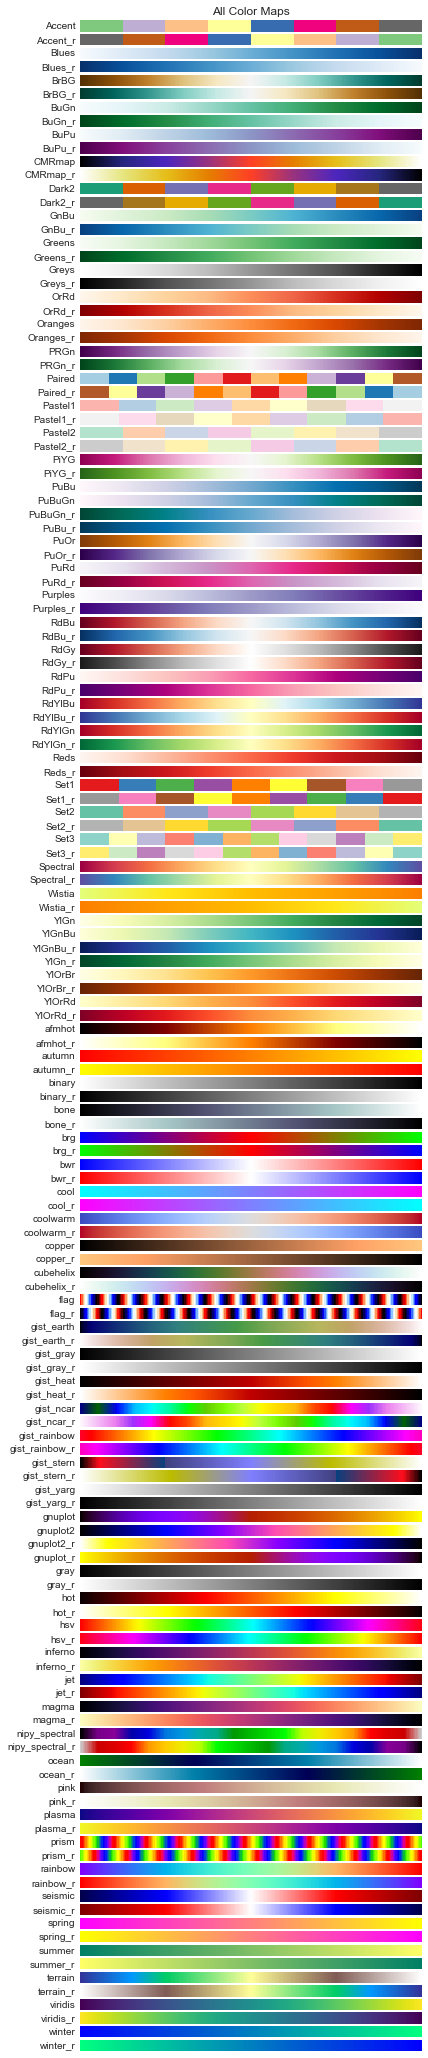

In [94]:
%matplotlib inline
display_colormaps()

### Simple Rendering of Data

- Simple renders can be circles, squares, solid colors, etc...
- Single color only

In [95]:
from arcgis.gis import GIS
gis = GIS(profile='your_online_profile', verify_cert=False)

In [96]:
first_map = gis.map()
first_map.basemap = 'dark-gray'
first_map

MapView(layout=Layout(height='400px', width='100%'))

<Item title:"World Cities" type:Feature Layer Collection owner:esri_dm>
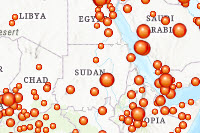

In [97]:
item = gis.content.get('c38377dbfc0f4c3dba27f9424e3a7f90')
item

In [98]:
flayer = item.layers[0]
df = flayer.query( as_df=True)

In [99]:
df.head()

ADMIN_NAME             CITY_NAME CNTRY_NAME FIPS_CNTRY GMI_ADMIN  \
0         Mato Grosso                Cuiaba     Brazil         BR   BRA-MGR   
1    Distrito Federal              Brasilia     Brazil         BR   BRA-DFD   
2               Goias               Goiania     Brazil         BR   BRA-GOI   
3  Mato Grosso do Sul          Campo Grande     Brazil         BR   BRA-MGD   
4             Amambay  Pedro Juan Caballero   Paraguay         PA   PRY-AMM   

   LABEL_FLAG  OBJECTID      POP               POP_CLASS  POP_RANK  PORT_ID  \
0           0         1   521934      500,000 to 999,999         3        0   
1           0         2  2207718  1,000,000 to 4,999,999         2        0   
2           0         3  1171195  1,000,000 to 4,999,999         2        0   
3           0         4   729151      500,000 to 999,999         3        0   
4           0         5     -999        Less than 50,000         7        0   

                                               SHAPE  \
0  {"x": -6244244.606196575, "y": -1760180.180467...   
1  {"x": -5331952.879361959, "y": -1780660.510942...   
2  {"x": -5483041.697485695, "y": -1889069.697082...   
3  {"x": -6079824.825958446, "y": -2326534.951854...   
4  {"x": -6205838.7185380785, "y": -2575640.10590...   

                            STATUS  
0               Provincial capital  
1  National and provincial capital  
2               Provincial capital  
3               Provincial capital  
4               Provincial capital

In [100]:
df.spatial.plot()

MapView(layout=Layout(height='400px', width='100%'))

### Advanced Simple Rendering


In [101]:
m2 = gis.map()
m2.extent = first_map.extent
m2.basemap = 'dark-gray'
m2

MapView(layout=Layout(height='400px', width='100%'))

In [102]:
df.spatial.plot(map_widget=m2,
                renderer_type='s',
                symbol_type='simple',
                symbol_style='s', # s - for square
                colors='Reds_r',
                cstep=10,
                outline_color='YlOrBr',
                marker_size=10)

True

### Class Break Renderer

In [103]:
m3 = gis.map(zoomlevel=4)
m3.center = [39,-98]
m3

MapView(layout=Layout(height='400px', width='100%'))

In [104]:
df.columns

Index(['ADMIN_NAME', 'CITY_NAME', 'CNTRY_NAME', 'FIPS_CNTRY', 'GMI_ADMIN',
       'LABEL_FLAG', 'OBJECTID', 'POP', 'POP_CLASS', 'POP_RANK', 'PORT_ID',
       'SHAPE', 'STATUS'],
      dtype='object')

In [105]:
df.spatial.plot(map_widget = m3,
                renderer_type='u', # specify the unique value renderer using its notation 'u'
                col='CNTRY_NAME'  # column to get unique values from
               )

True

In [106]:
m3.legend = True

### Class Break Renderer


In [107]:
m4 = gis.map('Reno, NV', zoomlevel=4)
m4.center = [39,-98]
m4

MapView(layout=Layout(height='400px', width='100%'))

In [108]:
m4.remove_layers(m4.layers)
df.spatial.plot(map_widget=m4,
               renderer_type='c',  # for class breaks renderer
               method='esriClassifyNaturalBreaks',  # classification algorithm
               class_count=10,  # choose the number of classes
               col='POP',  # numeric column to classify
               cmap='gnuplot2_r',  # color map to pick colors from for each class
               alpha=0.7  # specify opacity
               )

True

In [109]:
m4.legend = True

### Rendering Polygon Example


In [112]:
from arcgis.features import FeatureLayer
fl = FeatureLayer("https://sampleserver6.arcgisonline.com/arcgis/rest/services/Census/MapServer/2")
county_sdf = fl.query("STATE_NAME='Washington'", out_sr=4326, as_df=True)
county_sdf.head()

OBJECTID     NAME  STATE_NAME STATE_FIPS CNTY_FIPS   FIPS  POP2000  \
0      2953    Adams  Washington         53       001  53001    16428   
1      2954   Asotin  Washington         53       003  53003    20551   
2      2955   Benton  Washington         53       005  53005   142475   
3      2956   Chelan  Washington         53       007  53007    66616   
4      2957  Clallam  Washington         53       009  53009    64525   

   POP2007  POP00_SQMI  POP07_SQMI  ...  OWNER_OCC  RENTER_OCC  NO_FARMS97  \
0    17555         8.5         9.1  ...       3576        1653         628   
1    21237        32.1        33.1  ...       5612        2752         140   
2   164259        81.0        93.3  ...      36344       16522        1078   
3    71939        22.3        24.0  ...      16178        8843        1113   
4    70908        36.6        40.2  ...      19757        7407         292   

   AVG_SIZE97  CROP_ACR97  AVG_SALE97    SQMI  Shape_Length  Shape_Area  \
0        1746      808651      321.45  1930.0      3.879553    0.590994   
1        2175       87282       69.59   640.6      2.127905    0.193369   
2         568      440291      278.79  1760.0      3.259149    0.531696   
3         111       41046      131.54  2993.7      6.259164    0.932106   
4          72       12116       20.58  1764.3      5.627030    0.551224   

                                               SHAPE  
0  {"rings": [[[-119.36961802215399, 46.737285024...  
1  {"rings": [[[-117.48006100031489, 46.085736986...  
2  {"rings": [[[-119.87687899986594, 46.562399986...  
3  {"rings": [[[-121.17981297788657, 47.896832976...  
4  {"rings": [[[-124.73315299891175, 48.163761012...  

[5 rows x 53 columns]

In [113]:
m5 = gis.map('Seattle, WA', zoomlevel=6)
m5.basemap = 'dark-gray-vector'
m5

MapView(layout=Layout(height='400px', width='100%'))

In [114]:
county_sdf.spatial.plot(map_widget=m5,
                        renderer_type='c',  
                        method='esriClassifyNaturalBreaks',  
                        class_count=7,  
                        col='AGE_18_21', 
                        cmap='RdPu',  
                        alpha=0.8,
                        line_width=.25)

True

## Spatial Index

- Quickly find spatial locations 
    + generalized locations
- Based on Minimum bounding rectangles

### Index Visualized

<img src="./img/point_quadtree.png" />

### Spatial Index Example

<Item title:"USA Major Cities" type:Feature Layer Collection owner:esri_dm>
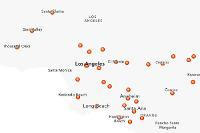

In [115]:
item = gis.content.get("85d0ca4ea1ca4b9abf0c51b9bd34de2e")
item

In [116]:
sdf = item.layers[0].query(as_df=True, out_sr=4326) # Major US Cities

In [117]:
len(sdf)

3886

In [118]:
index = sdf.spatial.sindex(stype='rtree')

In [119]:
nj_cities = index.intersect((-75.55956796790353, 38.928522146813044, 
                             -73.9024505439044, 41.35763612214295))

In [120]:
m6 = gis.map("New Jersey")
m6

MapView(layout=Layout(height='400px', width='100%'))

In [121]:
sdf.iloc[nj_cities].copy().spatial.plot(m6)

True

#### Notice the Following

- The bounding box returns locations outside of New Jersey
    + This means the the selction by location is **generalized**
    

### Limiting to NJ

In [122]:
agol_gis = GIS(set_active=False)

In [123]:
nj_boundary = agol_gis.content.get("e4bb3aeab5e14422be1727ccbe0c1fb9")

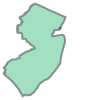

In [124]:
nj_bounds = nj_boundary.layers[0].query(out_sr=4326, as_df=True)
geom = nj_bounds.iloc[0].SHAPE
geom

In [125]:
extent_cities = sdf.iloc[nj_cities].reset_index()
extent_cities.ST.unique()

array(['NJ', 'NY', 'PA', 'DE'], dtype=object)

In [126]:
g_query = extent_cities.SHAPE.geom.disjoint(geom) == False
extent_cities[g_query].spatial.plot(renderer_type='s', cmap='autumn_r', cstep=190, marker_size=5, outline_size=.3)

MapView(layout=Layout(height='400px', width='100%'))

## Spatial Analysis

<img src="./img/panda_analysis.png"/>

- We have data, but how to we gain insights into the data?
- Python API provides a wealth of vector based analytics

### Using Geoprocessing Tools

- The work horse of analysis
- Service provide tools not available in the standard libary

In [127]:
from arcgis import create_viewshed
sub_sdf = sdf.iloc[[2981, 2982, 2983, 2984]]
sub_sdf = sub_sdf.copy().reset_index()
sub_sdf['OBJECTID'] = sub_sdf.index.tolist()
sub_sdf.head()

index  AGE_10_14  AGE_15_19  AGE_20_24  AGE_25_34  AGE_35_44  AGE_45_54  \
0   2981        544        626        702       1245       1357       1406   
1   2982       1350       1490       1368       2893       2691       3263   
2   2983        689        774        697       1436       1422       2106   
3   2984       2154       2295       2934       6396       4644       4213   

   AGE_55_64  AGE_5_9  AGE_65_74  ...  POP2010  POPULATION  POP_CLASS  \
0       1359      575       1006  ...    10465       10365          6   
1       2957     1401       1855  ...    23273       22624          6   
2       1967      666       1189  ...    13116       12798          6   
3       3068     2423       1663  ...    34324       35107          6   

   RENTER_OCC                                              SHAPE  ST  STFIPS  \
0        1976  {"x": -76.00026020499996, "y": 41.200390449000...  PA      42   
1        3830  {"x": -80.33582874999996, "y": 40.999553905000...  PA      42   
2        2321  {"x": -79.75234499999993, "y": 40.566740670000...  PA      42   
3        6994  {"x": -75.33986829499997, "y": 40.122444499000...  PA      42   

   VACANT  WHITE OBJECTID  
0     666  10040        0  
1    1539  19365        1  
2     930  11030        2  
3    1457  14048        3  

[4 rows x 52 columns]

In [128]:
vs = create_viewshed(input_layer=sub_sdf.spatial.to_feature_collection(), 
                     maximum_distance=20, 
                     max_distance_units="Miles")
vs

<FeatureCollection>

In [129]:
m_vs2 = gis.map()
m_vs2.basemap = 'streets'
m_vs2.extent = sub_sdf.spatial.full_extent
m_vs2

MapView(layout=Layout(height='400px', width='100%'))

In [149]:
m_vs2.add_layer(vs)
sub_sdf.spatial.plot(m_vs2,
                     renderer_type='s',
                     outline_color='Blues',
                     cstep=1,
                     marker_size=20)


True

### Using GeoEnrichment 

<img src="./img/panda_enrichment.jpg"/>

- Provides insights into a location or area
- Uses credits
- Driven heavily on SeDF

In [131]:
from arcgis.geoenrichment import enrich
enrich_df = enrich(study_areas=sub_sdf, data_collections=['Age'] )
enrich_df.head()

ID  OBJECTID_0 sourceCountry  POPULATION  HSEHLD_1_M  AGE_75_84 STFIPS  \
0  0           1            US       10365         907        797     42   
1  1           2            US       22624        1704       1518     42   
2  2           3            US       12798        1028        923     42   
3  3           4            US       35107        2127       1017     42   

   HISPANIC  POP_CLASS  FEMALES  ...  FEM45 FEM50  FEM55  FEM60  FEM65  FEM70  \
0       270          6     5464  ...    320   315    308    321    325    289   
1       381          6    12244  ...    288   327    381    400    344    283   
2       201          6     6964  ...    385   393    456    478    439    330   
3      9714          6    17218  ...    943   881    863    795    669    522   

   FEM75 FEM80  FEM85                                              SHAPE  
0    246   181    222  {"rings": [[[-76.00026020499996, 41.2148815106...  
1    232   188    357  {"rings": [[[-80.33582874999998, 41.0140454735...  
2    253   196    284  {"rings": [[[-79.75234499999993, 40.5812333290...  
3    341   240    334  {"rings": [[[-75.33986829499997, 40.1369382748...  

[4 rows x 99 columns]

In [132]:
enrich_df.spatial.plot()

MapView(layout=Layout(height='400px', width='100%'))

### Custom Analysis

- Besides the built in tool SeDF allows for complete customize of analysis process


In [133]:
df = pd.read_csv("./data/listings.csv", low_memory=False)
df.head()

id                         listing_url       scrape_id last_scraped  \
0   2818   https://www.airbnb.com/rooms/2818  20181206172549   2018-12-06   
1   3209   https://www.airbnb.com/rooms/3209  20181206172549   2018-12-06   
2  20168  https://www.airbnb.com/rooms/20168  20181206172549   2018-12-06   
3  25428  https://www.airbnb.com/rooms/25428  20181206172549   2018-12-06   
4  27886  https://www.airbnb.com/rooms/27886  20181206172549   2018-12-06   

                                                name  \
0           Quiet Garden View Room & Super Fast WiFi   
1                  Quiet apt near center, great view   
2         100%Centre-Studio 1 Private Floor/Bathroom   
3                Lovely apt in City Centre (Jordaan)   
4  Romantic, stylish B&B houseboat in canal district   

                                             summary  \
0           Quiet Garden View Room & Super Fast WiFi   
1  You will love our spacious (90 m2) bright apar...   
2  Cozy studio on your own private floor, 100% in...   
3                                                NaN   
4  Stylish and romantic houseboat on fantastic hi...   

                                               space  \
0  I'm renting a bedroom (room overlooking the ga...   
1  Our apartment has lots of light, a balcony and...   
2  For those who like all facets of city life. In...   
3  This nicely furnished, newly renovated apt  is...   
4  For a romantic couple: A beautifully restored ...   

                                         description experiences_offered  \
0  Quiet Garden View Room & Super Fast WiFi I'm r...                none   
1  You will love our spacious (90 m2) bright apar...                none   
2  Cozy studio on your own private floor, 100% in...                none   
3  This nicely furnished, newly renovated apt  is...                none   
4  Stylish and romantic houseboat on fantastic hi...                none   

                               neighborhood_overview  ... requires_license  \
0  Indische Buurt ("Indies Neighborhood") is a ne...  ...                f   
1  Welcome to the Spaarndammerbuurt! From the beg...  ...                f   
2  Located just in between famous central canals....  ...                f   
3                                                NaN  ...                f   
4         Central, quiet, safe, clean and beautiful.  ...                f   

  license jurisdiction_names instant_bookable is_business_travel_ready  \
0     NaN        {Amsterdam}                t                        f   
1     NaN        {Amsterdam}                f                        f   
2     NaN        {Amsterdam}                f                        f   
3     NaN        {Amsterdam}                f                        f   
4     NaN        {Amsterdam}                t                        f   

           cancellation_policy  require_guest_profile_picture  \
0  strict_14_with_grace_period                              f   
1                     moderate                              f   
2  strict_14_with_grace_period                              f   
3  strict_14_with_grace_period                              f   
4  strict_14_with_grace_period                              f   

  require_guest_phone_verification  calculated_host_listings_count  \
0                                f                               1   
1                                f                               1   
2                                f                               2   
3                                f                               2   
4                                f                               1   

   reviews_per_month  
0               2.10  
1               1.03  
2               2.18  
3               0.09  
4               2.03  

[5 rows x 96 columns]

#### Examining the Review Scores

In [134]:
ratings = ['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 
          'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 
          'review_scores_value', 'latitude', 'longitude']
df[ratings].describe()

review_scores_rating  review_scores_accuracy  \
count          17391.000000            17381.000000   
mean              94.849520                9.679765   
std                6.648685                0.685271   
min               20.000000                2.000000   
25%               93.000000                9.000000   
50%               97.000000               10.000000   
75%              100.000000               10.000000   
max              100.000000               10.000000   

       review_scores_cleanliness  review_scores_checkin  \
count               17383.000000           17369.000000   
mean                    9.465627               9.735563   
std                     0.867973               0.646557   
min                     2.000000               2.000000   
25%                     9.000000              10.000000   
50%                    10.000000              10.000000   
75%                    10.000000              10.000000   
max                    10.000000              10.000000   

       review_scores_communication  review_scores_location  \
count                 17378.000000            17370.000000   
mean                      9.785361                9.421531   
std                       0.599409                0.727931   
min                       2.000000                2.000000   
25%                      10.000000                9.000000   
50%                      10.000000               10.000000   
75%                      10.000000               10.000000   
max                      10.000000               10.000000   

       review_scores_value      latitude     longitude  
count         17371.000000  20030.000000  20030.000000  
mean              9.175004     52.365212      4.888977  
std               0.805422      0.015996      0.035573  
min               2.000000     52.288378      4.753247  
25%               9.000000     52.355126      4.863595  
50%               9.000000     52.364590      4.886387  
75%              10.000000     52.375074      4.908288  
max              10.000000     52.424713      5.027689

In [135]:
data = df[~df['review_scores_value'].isna()].copy().reset_index(drop=True)
sdf_airbnb = pd.DataFrame.spatial.from_xy(df=data, y_column='latitude', x_column='longitude', sr=4326)

In [136]:
sdf_airbnb.spatial.full_extent

(4.763264201049322, 52.2892744181358, 5.027688954448574, 52.42471256156165)

In [137]:
m10 = gis.map()
m10.extent = sdf_airbnb.spatial.full_extent
m10

MapView(layout=Layout(height='400px', width='100%'))

#### K-Means Clustering

- Unsupervised learning  technique
    + finds hidden structures in data when we don't know the answer upfront


In [138]:
from sklearn import cluster

- Remove and NaN or NULL value from the columns of interest
- Convert price from string to numeric
- Select only 'Entire home/apt' 

In [139]:
q = (sdf_airbnb['room_type'] == 'Entire home/apt') & (sdf_airbnb['beds'] >=4)

sdf_airbnb = (sdf_airbnb
              .loc[q]
              .dropna(axis=0, subset=ratings)
              .copy()
              .reset_index(drop=True))

sdf_airbnb['RENTALPRICE'] = (sdf_airbnb
                                    .price
                                    .str
                                    .replace("$", "")
                                    .str.replace(",","")
                             .apply(float))

In [140]:
import warnings
warnings.simplefilter('ignore')

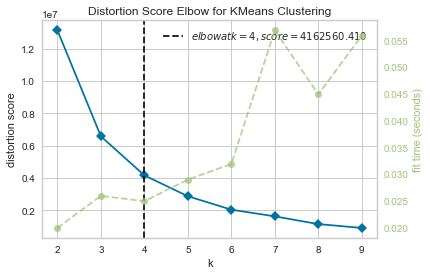

In [141]:
from yellowbrick.cluster import KElbowVisualizer

model = cluster.KMeans()
visualizer = KElbowVisualizer(model, k=(2,10))

visualizer.fit(sdf_airbnb[['latitude', 'longitude', 'RENTALPRICE']].values)        # Fit the data to the visualizer
visualizer.show();       # Finalize and render the figure

In [142]:
kmeans5 = cluster.KMeans(n_clusters=4,
                        init='random',
                        n_init=10,
                        max_iter=300,
                        random_state=0)
k5cls = kmeans5.fit_predict(sdf_airbnb[['latitude', 'longitude', 'RENTALPRICE']].values)
sdf_airbnb['class'] = k5cls

In [143]:
display_columns = ['SHAPE', 'class', 'name', 'summary', "price"]

In [144]:
m11 = gis.map()
m11.extent = sdf_airbnb.spatial.full_extent
m11

MapView(layout=Layout(height='400px', width='100%'))

In [145]:
import warnings
warnings.simplefilter('ignore')

In [146]:
sdf_airbnb[display_columns].copy().spatial.plot(map_widget=m11,
               renderer_type='u',  # for unique renderer
               col='class',  # numeric column to classify
               cmap='gist_ncar',  
               line_width=0,
               alpha=0.7)

True

In [147]:
m11.basemap = 'dark-gray'

In [148]:
m11.legend = True